In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset
stats = pd.read_csv('Stats.csv')


In [64]:
stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [65]:
stats = stats[(stats['3PA'] >= 0.5) & (stats['G'] >= 25)]
new_stats = stats[['FT%','3P%']]

In [66]:
new_stats.head()

,FT%,3P%
0,0.616,0.268
1,0.571,0.277
2,0.643,0.260
3,0.755,0.357
4,0.661,0.294


In [67]:
print(new_stats['FT%'].corr(new_stats['3P%']))

0.3158912609656668


<Axes: xlabel='FT%', ylabel='3P%'>

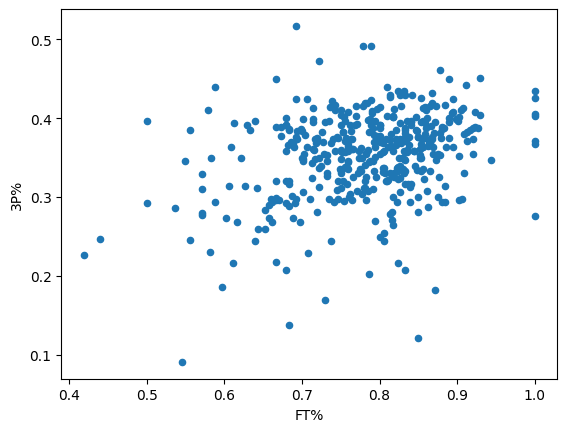

In [68]:
new_stats.plot.scatter('FT%','3P%')

In [69]:
# Get the day of year and price in sepereate arrays
X = new_stats['FT%'].to_numpy().reshape(-1,1)
y = new_stats['3P%'].to_numpy().reshape(-1,1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
pred = lin_reg.predict(X_test)

In [74]:
mse = np.sqrt(mean_squared_error(y_test, pred))

# Print the mean square error in an easy to read format
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 0.0441 (12.4%)


In [75]:
# Calculate the coefficient of determination
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.0868586865694867


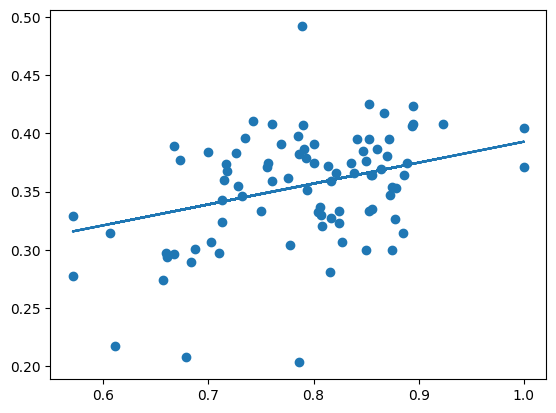

In [76]:
# Create a scatter plot using our test data 
plt.scatter(X_test,y_test)

# Add a line to the plot with the predictions
plt.plot(X_test, pred)